In [20]:
%matplotlib inline 
# see predict.py lib for functions
from predict import *
rcParams['figure.figsize'] = 30, 7


Range : 2014-01-01 00:00:00 to 2016-01-01 00:00:00


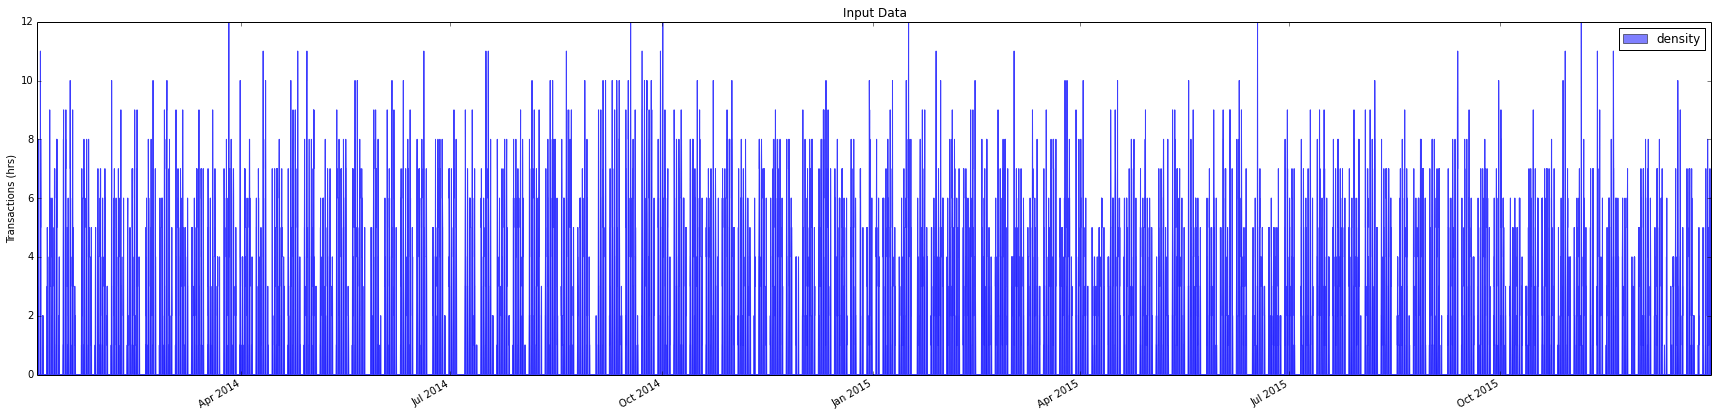

In [21]:
# Init Data
data_path = 'datastore/paystations/'
data_file = '76429_2014ToNow.d'
start = pd.to_datetime('1-1-2014', format='%m-%d-%Y')
end = pd.to_datetime('1-1-2016', format='%m-%d-%Y')
ts = load_data(data_path + data_file, start, end)
X = init_features(ts)  # features considered for prediction
Y = ts['density']  # variable to predict
    

In [22]:
# Run Model
model_params = {'n_estimators': 200, 'max_depth': 6,
                'learning_rate': 0.1, 'loss': 'huber', 'alpha': 0.95}

# Option 1: random sample training(80% train)
# x_train, y_train, x_test, y_test = train_stochastic(X, Y, 0.8)  

# Option 2: Chronological training
predict_window = 14 # predict 1 week
x_train, y_train, x_test, y_test = train_history(X, Y, predict_window)  # train past data

# Results
results = GradientBoostingRegressor(**model_params).fit(x_train, y_train)
prediction = np.round(results.predict(x_test))


In [ ]:
# Analyse Results
print_error(prediction, y_test)
plot_prediction(prediction, x_test, y_test)
feature_importance(results, X)
feature_dependence(results, X, x_train)